In [135]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [136]:
train = pd.read_csv("data/Train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Columns: 1559 entries, feature_1 to Class
dtypes: float64(1), int64(1558)
memory usage: 21.0 MB


In [137]:
test = pd.read_csv("data/Test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 1558 entries, feature_1 to feature_1558
dtypes: float64(4), int64(1554)
memory usage: 9.0 MB


In [138]:
X_train = train.loc[:, 'feature_1':'feature_1558']
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Columns: 1558 entries, feature_1 to feature_1558
dtypes: float64(1), int64(1557)
memory usage: 21.0 MB


In [139]:
y_train = train.loc[:, 'Class']
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [140]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(test)

In [141]:
# pca = PCA(n_components=50)
# X_train = pca.fit_transform(X_train)
# X_test = pca.fit_transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=100)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(test)

C:\Users\subru\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1558, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\subru\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [142]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [143]:
X_train.head()

,0
0,-0.371734
1,-0.654071
2,-0.625549
3,-0.756595
4,-0.965368


In [144]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=4)

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

lr_model = LogisticRegression()

In [72]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
lr_prob = model_LR.predict_proba(X_val)[:,1] # This will give you positive class prediction probabilities  
lr_pred = np.where(lr_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
lr_model.score(X_val, y_val)

0.9235127478753541

In [83]:
confusion_matrix=metrics.confusion_matrix(y_val, lr_pred)
confusion_matrix

array([[318,   6],
       [ 21,   8]], dtype=int64)

In [84]:
auc_roc=metrics.roc_auc_score(y_val, lr_pred)
auc_roc

0.6286717752234994

In [86]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, lr_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8303533418475947

Text(0.5, 0, 'False Positive Rate')

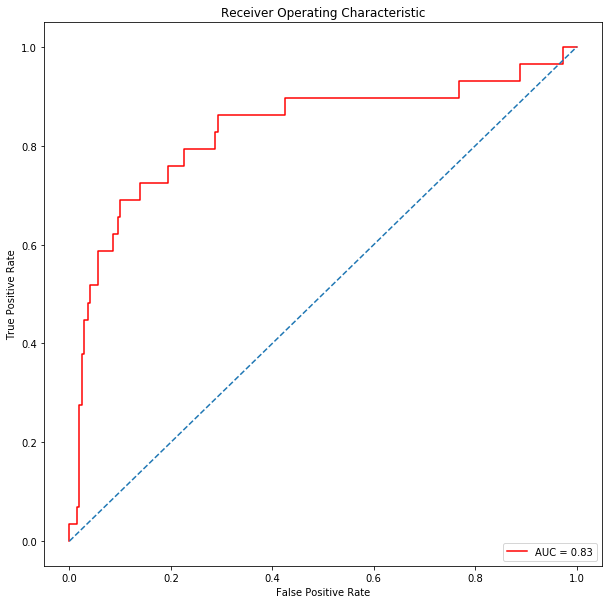

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [146]:
tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1','l2']}

In [147]:
from sklearn.model_selection import GridSearchCV

lr_grid = GridSearchCV(LogisticRegression(), tuned_parameters, cv=10, scoring='roc_auc')

In [148]:
lr_grid.fit(X_train, y_train)
lr_grid.best_params_

C:\Users\subru\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\subru\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\subru\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\subru\Anaconda3\lib\site-packages\

{'C': 0.001, 'penalty': 'l2'}

In [104]:
# lr_model = LogisticRegression(C=0.001, penalty='l2')

In [105]:
# lr_model.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
lr_prob = lr_grid.predict_proba(X_val)[:,1]
lr_pred = np.where(lr_prob > 0.5, 1, 0)
lr_grid.score(X_val, y_val)

0.9921243082162622

In [150]:
confusion_matrix=metrics.confusion_matrix(y_val, lr_pred)
confusion_matrix

array([[324,   0],
       [ 17,  12]], dtype=int64)

In [151]:
auc_roc=metrics.roc_auc_score(y_val, lr_pred)
auc_roc

0.7068965517241379

In [152]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, lr_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9921243082162622

In [153]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [154]:
nb_prob = nb_model.predict_proba(X_val)[:,1] # This will give you positive class prediction probabilities  
nb_pred = np.where(nb_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
nb_model.score(X_val, nb_pred)

1.0

In [155]:
confusion_matrix=metrics.confusion_matrix(y_val,nb_pred)
confusion_matrix

array([[312,  12],
       [  2,  27]], dtype=int64)

In [156]:
auc_roc=metrics.roc_auc_score(y_val,nb_pred)
auc_roc

0.9469987228607919

In [157]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, nb_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9921243082162623

Text(0.5, 0, 'False Positive Rate')

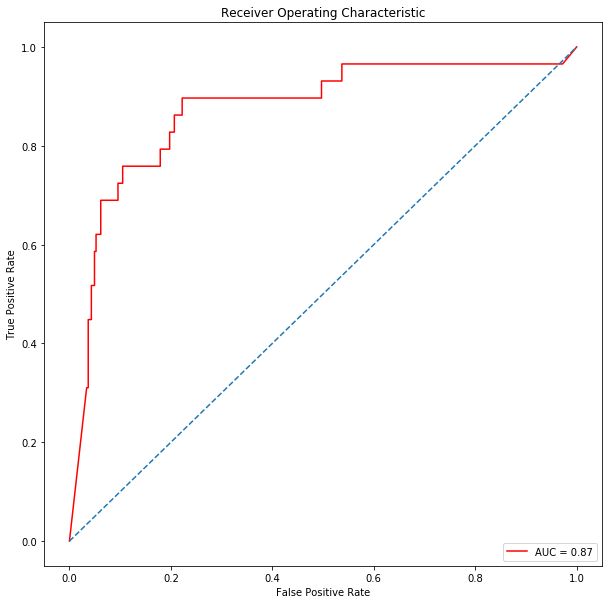

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [158]:
from sklearn.svm import SVC
svm_model= SVC()

In [162]:
tuned_parameters = {
#  'C': [1, 10, 100], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 'degree': [2,3,4,5,6] , 'C':[1,10,100] , 'kernel':['poly']
    }

In [30]:
# from sklearn.model_selection import RandomizedSearchCV

# model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [31]:
# model_svm.fit(X_train, y_train)
# print(model_svm.best_score_)

In [163]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(SVC(), tuned_parameters, cv=10, scoring='roc_auc')

In [ ]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

In [ ]:
model_svm.best_params_

In [ ]:
y_pred= model_svm.predict(X_val)
print(metrics.accuracy_score(y_pred,y_val))

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_val,y_pred)
confusion_matrix

In [ ]:
auc_roc=metrics.classification_report(y_val,y_pred)
auc_roc

In [ ]:
auc_roc=metrics.roc_auc_score(y_val,y_pred)
auc_roc

In [40]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5754044274159218

Text(0.5, 0, 'False Positive Rate')

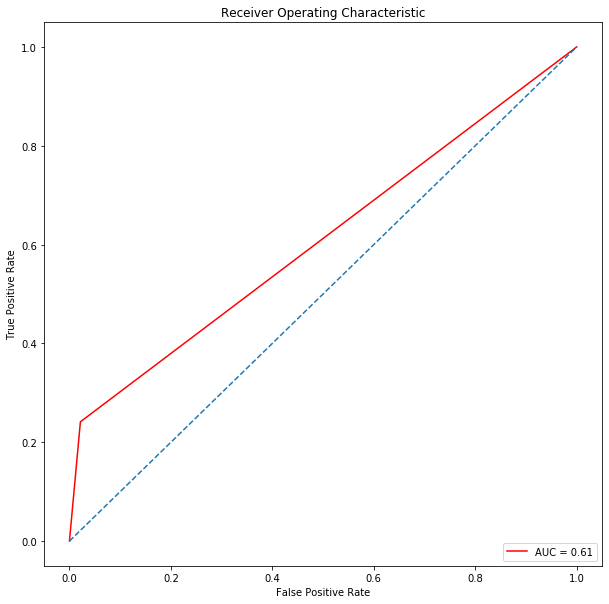

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [50]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }

In [71]:
from sklearn.model_selection import RandomizedSearchCV

RR_model= RandomizedSearchCV(RandomForestClassifier(), tuned_parameters,cv=10,scoring='f1_micro',n_iter=20,n_jobs= -1)

In [72]:
RR_model.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [73]:
RR_model.best_score_

0.926950354609929

In [74]:
RR_model.best_params_

{'n_estimators': 30, 'min_samples_leaf': 30, 'max_features': 'log2'}

In [75]:
y_prob = RR_model.predict_proba(X_val)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
RR_model.score(X_val, y_pred)

1.0

In [76]:
confusion_matrix=metrics.confusion_matrix(y_val,y_pred)
confusion_matrix

array([[321,   3],
       [ 24,   5]], dtype=int64)

In [77]:
auc_roc=metrics.classification_report(y_val,y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       324
           1       0.62      0.17      0.27        29

    accuracy                           0.92       353
   macro avg       0.78      0.58      0.61       353
weighted avg       0.91      0.92      0.90       353

